In [1]:
# %pip install kagglehub

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [3]:
# Download latest version
path = kagglehub.dataset_download("terminus7/pokemon-challenge")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/terminus7/pokemon-challenge/versions/1


In [4]:
data = pd.read_csv('/workspaces/codespaces-jupyter/data/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
# data.corr() <- code ini akan menghasilkan error

In [7]:
# melakukan identifikasi kolom yang memiliki tipe data 'object' atau 'string'
object_column = data.select_dtypes(include=['object']).columns

In [8]:
# menghapus kolom yang bertipe 'object' atau 'string'
data_corr = data.drop(columns= object_column)

In [9]:
print("DataFrame sebelum dihapus kolom bertipe object:")
print(data)
print("\nDataFrame setelah dihapus kolom bertipe object:")
print(data_corr)

DataFrame sebelum dihapus kolom bertipe object:
       #            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0      1       Bulbasaur    Grass  Poison  45      49       49       65   
1      2         Ivysaur    Grass  Poison  60      62       63       80   
2      3        Venusaur    Grass  Poison  80      82       83      100   
3      4   Mega Venusaur    Grass  Poison  80     100      123      122   
4      5      Charmander     Fire     NaN  39      52       43       60   
..   ...             ...      ...     ...  ..     ...      ...      ...   
795  796         Diancie     Rock   Fairy  50     100      150      100   
796  797    Mega Diancie     Rock   Fairy  50     160      110      160   
797  798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798  799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799  800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  
0     

In [10]:
data_corr.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,45,49,49,65,65,45,1,False
1,2,60,62,63,80,80,60,1,False
2,3,80,82,83,100,100,80,1,False
3,4,80,100,123,122,120,80,1,False
4,5,39,52,43,60,50,65,1,False


In [11]:
data_corr.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


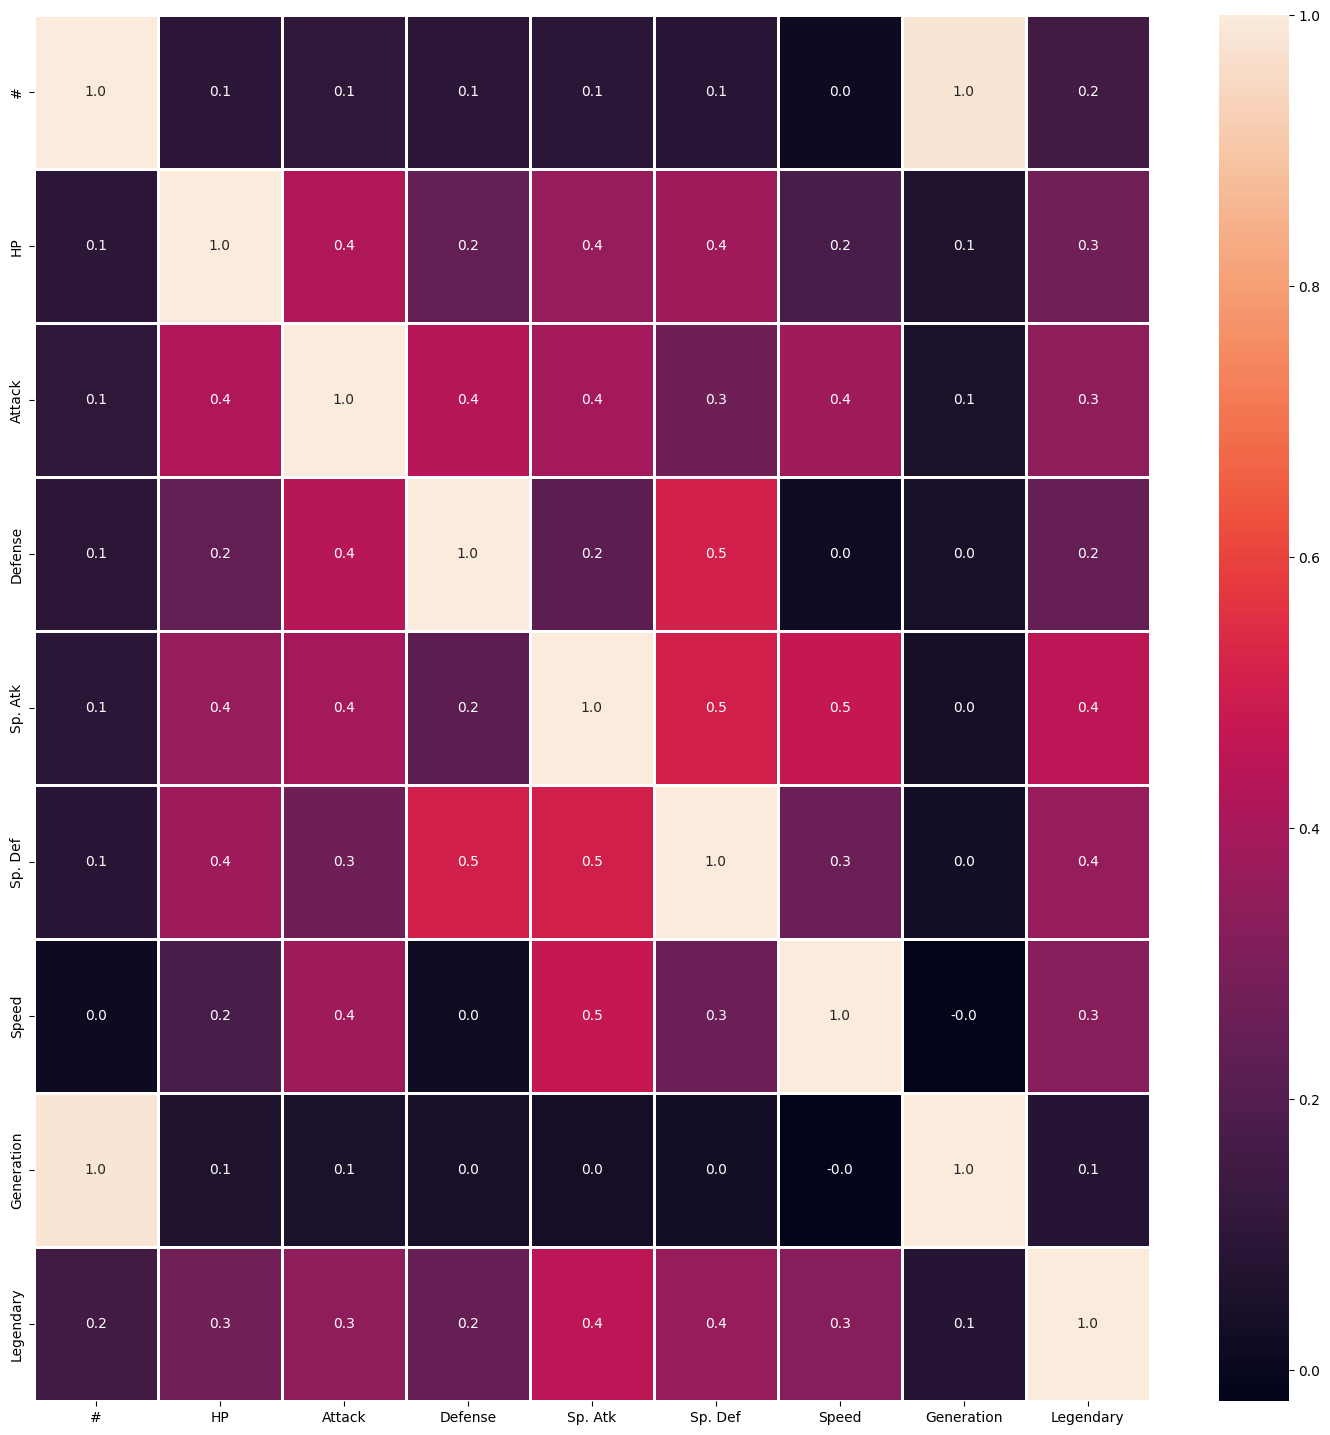

In [12]:
# melakukan corelasi map
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(data_corr.corr(), annot=True, linewidths=2, fmt= '.1f', ax=ax)
plt.show()

In [13]:
# data_corr.boxplot(column='Attack',by = 'Legendary')

<Figure size 1000x600 with 0 Axes>

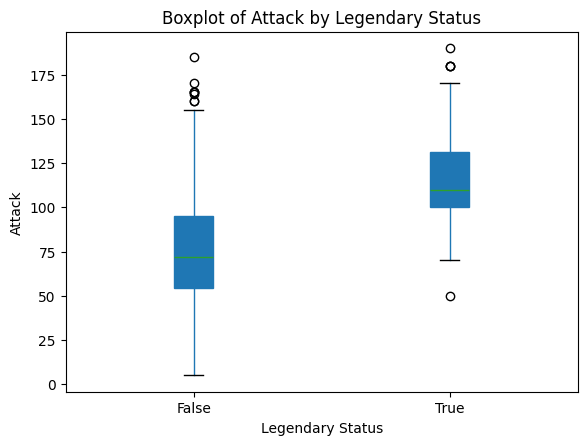

In [15]:
# Plot boxplot
plt.figure(figsize=(10, 6))
boxplot = data.boxplot(column='Attack', by='Legendary', grid=False, patch_artist=True)

# Menambahkan warna pada boxplot
colors = ['#FF9999', '#66B2FF']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)

# Menambahkan judul dan label sumbu
plt.title('Boxplot of Attack by Legendary Status')
plt.suptitle('')  # Menghilangkan judul default untuk menghindari redundansi
plt.xlabel('Legendary Status')
plt.ylabel('Attack')

# Menampilkan plot
plt.show()

In [16]:
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [17]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### Plot Data

**MATPLOTLIB**
: Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.

* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

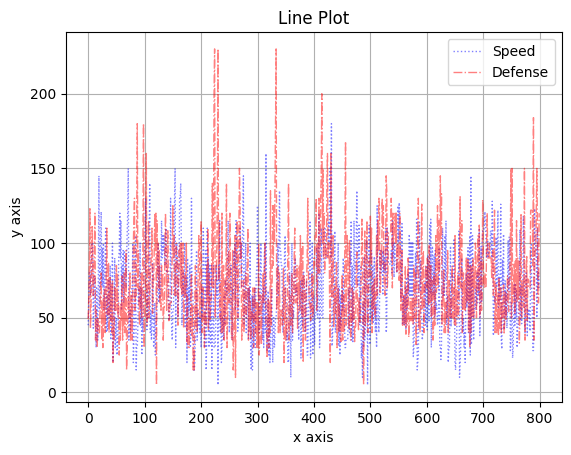

In [18]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data_corr.Speed.plot(kind = 'line', color = 'b',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data_corr.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

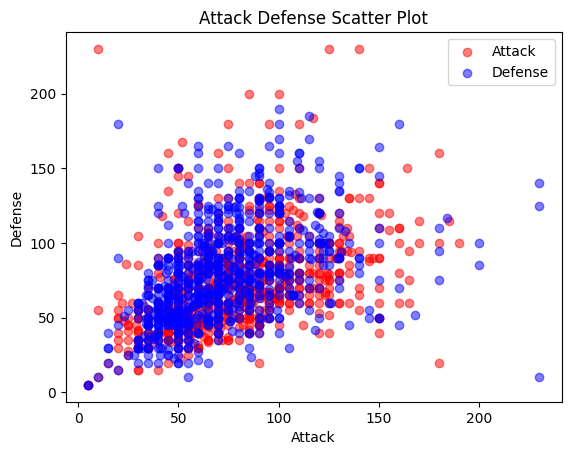

In [19]:
# Membuat scatter plot dengan warna berbeda untuk Attack dan Defense
plt.scatter(data['Attack'], data['Defense'], alpha=0.5, color='red', label='Attack')
plt.scatter(data['Defense'], data['Attack'], alpha=0.5, color='blue', label='Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

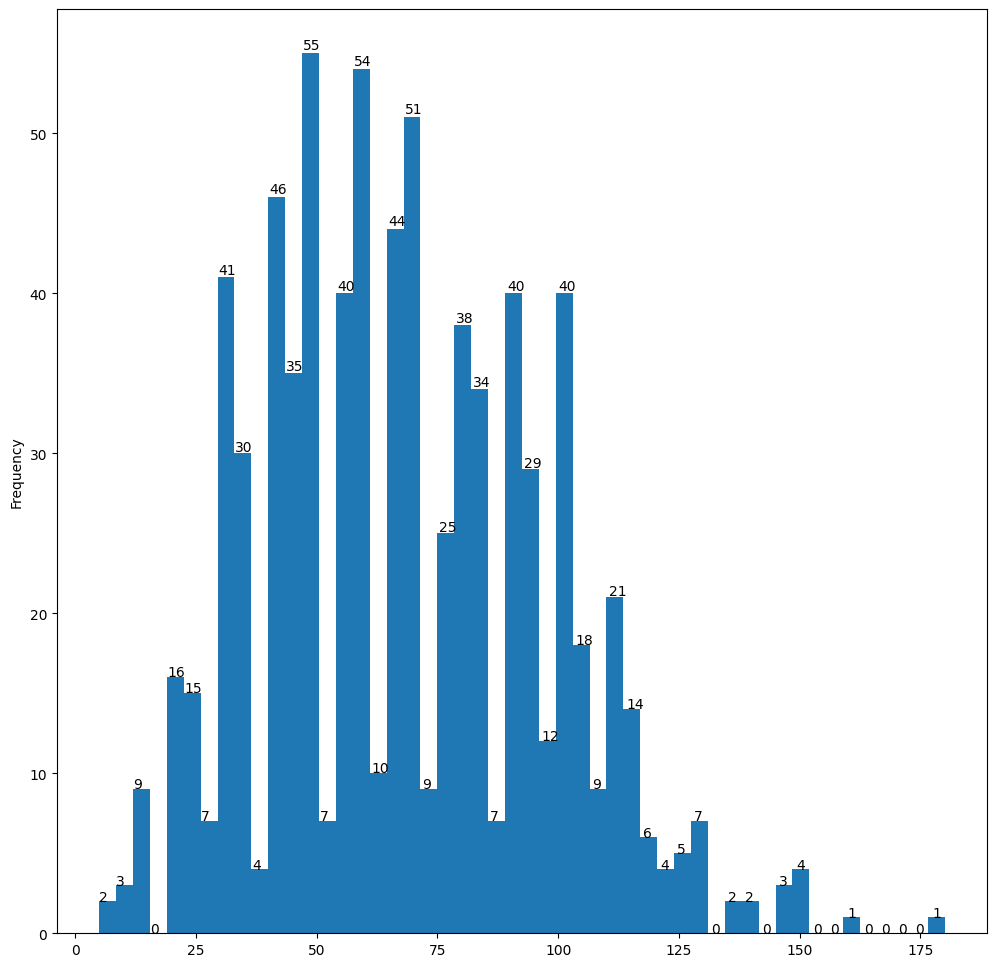

In [20]:
# Plot histogram
ax = data.Speed.plot(kind='hist', bins=50, figsize=(12,12))

# Menambahkan label nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()